<a href="https://colab.research.google.com/github/Raushan787/IPR/blob/main/IPR_using_Prssure_sq_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [172]:
#Data taken from Tarek Ahmed Example-8-3
Pr=1952 #psia initial prssure of reservoir
Pr_f=1700  #psia prssure of reservoir after depletion
Pwf_i=np.array([1700,1500,1300]) #psia
Qg=np.array([2624.6,4154.7,5425.1]) #Mscf/day

ug_z=0.01206 # at 1952 psia
ug_z_f=0.01180 #at 1700 psia

**Detail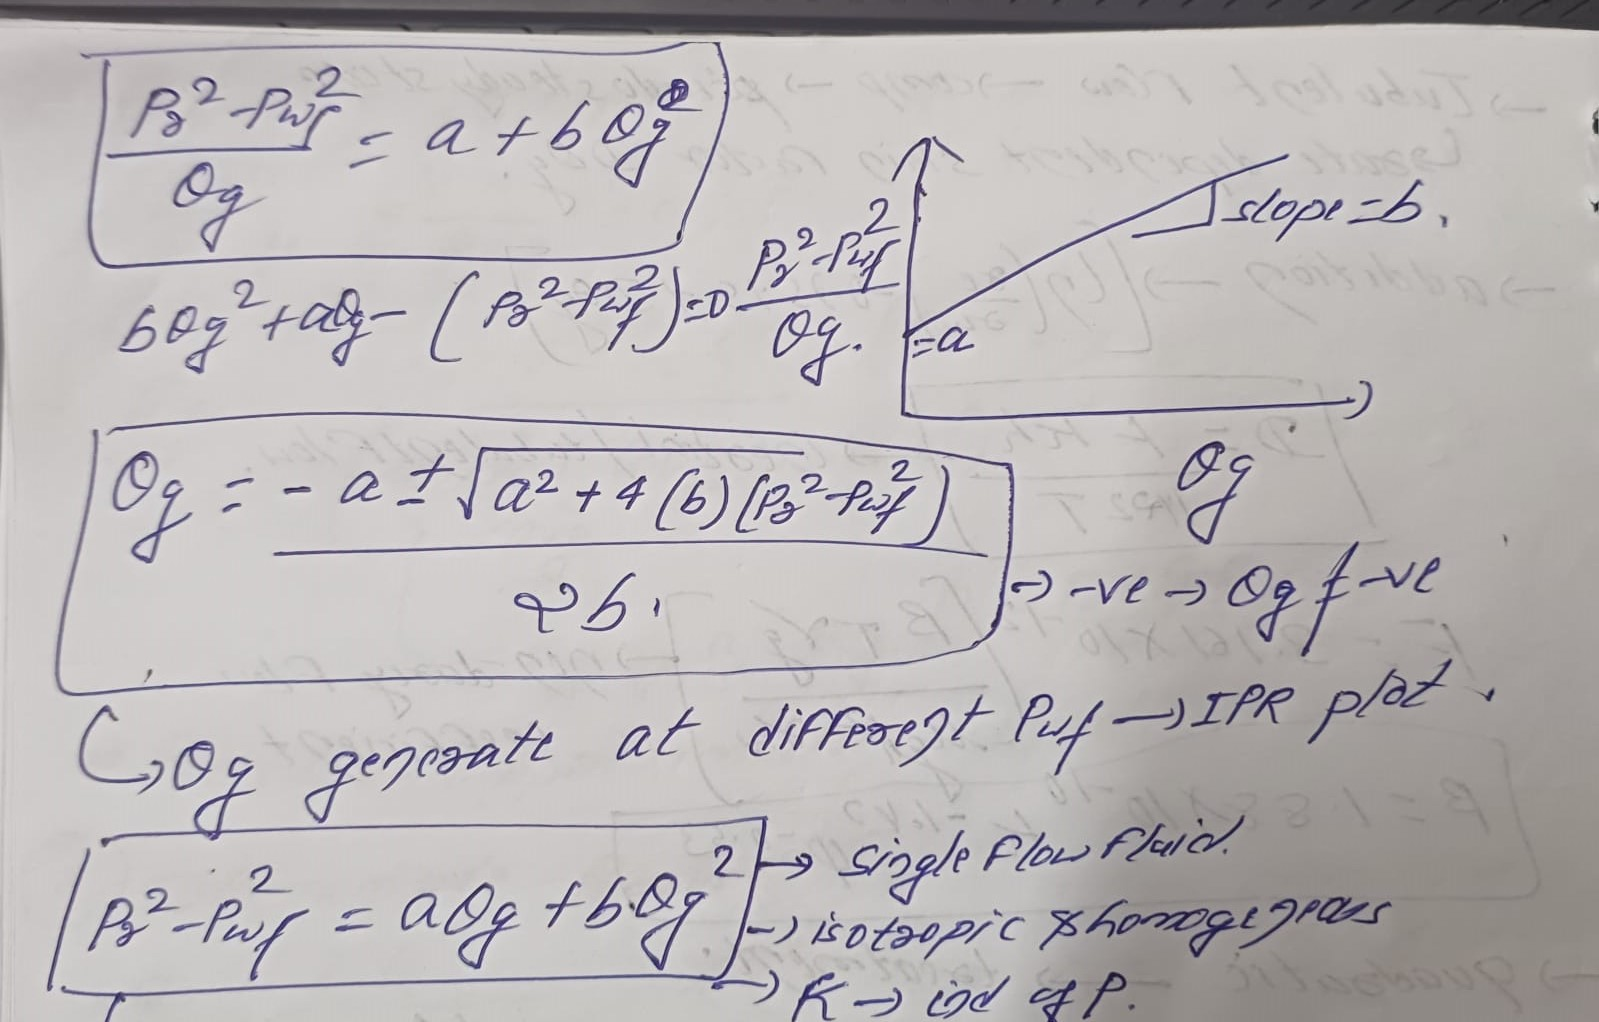**

In [173]:
#Calculating (Pr**2 - Pwf**2)/Qg
result=((Pr**2)-(Pwf_i**2))/Qg
result


array([350.64543168, 375.55154403, 390.83224272])

In [174]:
#Creating dataframe
df=pd.DataFrame({"Pwf":Pwf_i,"Qg":Qg,"(Pr**2-Pwf**2)/Qg":result})
df

,Pwf,Qg,(Pr**2-Pwf**2)/Qg
0,1700,2624.6,350.645432
1,1500,4154.7,375.551544
2,1300,5425.1,390.832243


In [175]:
#Perform linear regression in log-log space
slope, intercept, r_value, p_value, std_err=linregress(Qg,result)
slope , intercept

(0.014414792738998665, 313.70177397969877)

In [176]:
#Slope=b
#Intercept=a

a=intercept
b=slope

In [177]:
#Create array of Pwf
Pwf=np.arange(Pr,-1,-1)

In [178]:
#Generating IPR curve for initial reservoir pressure
Qg=(-a+ np.sqrt(a**2+4*b*(Pr**2-Pwf**2)))/(2*b)

AOF=(-a+np.sqrt(a**2+4*b*(Pr**2)))/(2*b)
Qg

array([   0.        ,   12.43464813,   24.84875789, ..., 8682.34676733,
       8682.35208638, 8682.35385939])

Future IPR

In [179]:
#Calculating of a and b constant after reservoir pressure depletion 1700
Pwf_f=np.arange(1700,-1,-1)
a_f=a*(ug_z_f/ug_z)
b_f=b*(ug_z_f/ug_z)
a_f,b_f

(306.93871749257426, 0.01410402606303352)

In [180]:
#Generating IPR curve for final reservoir pressure
Qg_f=(-a_f+ np.sqrt(a_f**2+4*b_f*(Pr_f**2-Pwf_f**2)))/(2*b_f)

AOF_f=(-a_f+np.sqrt(a_f**2+4*b_f*(Pr_f**2)))/(2*b_f)
Qg_f

array([   0.        ,   11.06824255,   22.11874675, ..., 7099.50149129,
       7099.50740609, 7099.50937769])

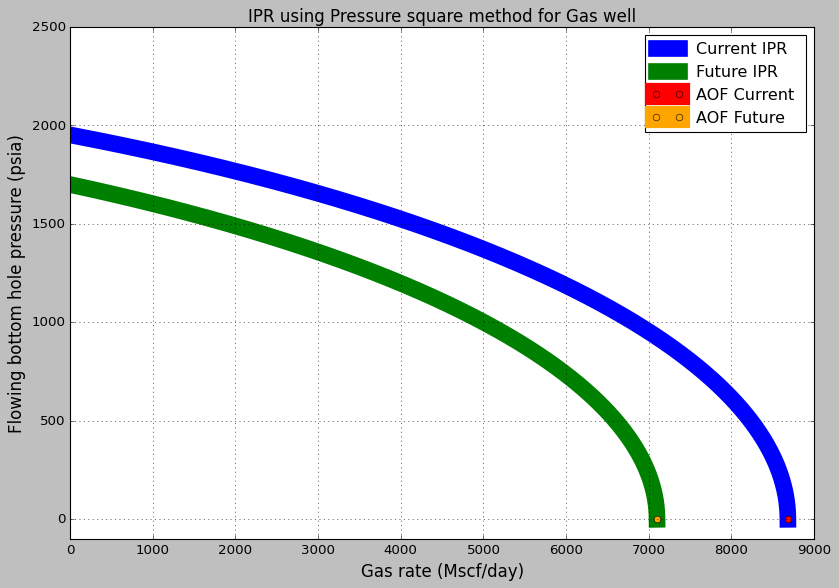

In [181]:
#Create plot
plt.figure(figsize=(12,8))
plt.style.use("classic")
plt.plot(Qg,Pwf,label="Current IPR",lw="15")
plt.plot(Qg_f,Pwf_f,label="Future IPR",lw="15")
plt.plot(AOF,0,label="AOF Current ",marker="o",c="red",lw=20)
plt.plot(AOF_f,0,label="AOF Future ",marker="o",c="orange",lw=20)
plt.ylim(-100,2500)
plt.ylabel("Flowing bottom hole pressure (psia)",size=15)
plt.xlabel("Gas rate (Mscf/day)",size=15)
plt.title("IPR using Pressure square method for Gas well",size=15)
plt.legend(loc="best")
plt.grid()
plt.show()